## Exercise 2: Basic Statistics and Simulation

In [1]:
import numpy as np
import pandas as pd

### Task 1: Statistical Analysis on the Iris Dataset

We reconsider the Iris dataset that was introduced in last week's exercise.

In [2]:
df = pd.read_csv("iris.data", names = ["sepal_length", "sepal_width"," petal_weight", "petal_width", "class"])
df.head()

,sepal_length,sepal_width,petal_weight,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### a) Descriptive Statistics
Use pandas built-in functions to compute the mean, variance, minimum and maximum of the _sepal length_ of all plants in the datasets

In [3]:
print(df.sepal_length.mean())
print(df.sepal_length.var())
print(df["sepal_length"].min())
print(df.loc[:,"sepal_length"].max())

5.843333333333335
0.6856935123042505
4.3
7.9


#### b) Implementing the median

Write a function that takes a (numerical) column of a pandas dataframe as input and computes its median. Use it to compute the median of the _petal width_ and compare it to the output of pandas built-in median function.

In [4]:
def median(col):
    """
    :param col: pandas series, corresponding to the column we want to compute the median of
    :
    :return: the resulting median value as float 
    """
    
    m_ind = int((len(col)-1)/2)
    # convert to numpy to avoid hassle with panda index
    col = col.to_numpy()
    col.sort()
    return col[m_ind]
    
print(median(df.loc[:,"petal_width"]))
print(df.petal_width.median())

1.3
1.3


#### c) Pearson's Correlation Coefficient

Write a function that takes two (numerical) pandas columns as input and returns their Pearson correlation coefficient. Do not use any pandas/numpy/scipy built-ins. Apply your function to compute the correlation between _sepal length_ and _sepal width_. Check it for correctness by applying the corresponding [scipy built-in](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html). 

In [5]:
def pearson(x, y):
    """
    :param x: pandas series
    :param y: pandas series
    :
    :return: the resulting pearson correlation
    """
    
    n = len(x)
    x_hat, y_hat = sum(x)/n, sum(y)/n
    dx, dy = [v-x_hat for v in x], [v-y_hat for v in y]
    s_x, s_y = (sum(d**2 for d in dx)/n)**.5, (sum(d**2 for d in dy)/n)**.5
    
    return sum(dx[i]*dy[i]/n for i in range(n))/(s_x*s_y)

In [6]:
from scipy.stats import pearsonr

print(pearson(df.sepal_length,df.sepal_width))
print(pearsonr(df.sepal_length,df.sepal_width))

-0.10936924995064931
(-0.10936924995064935, 0.1827652152713699)


#### d) Hypothesis Testing

Compute the mean _sepal width_ for all plants that are classed as _Iris-versicolor_ and for all plants that are classed as _Iris-virginica_ .

In [7]:
mean_versicolor = df.loc[df.loc[:,"class"] == "Iris-versicolor"].sepal_width.mean()
mean_virginica = df.loc[df.loc[:,"class"] == "Iris-virginica"].sepal_width.mean()


print(mean_versicolor)
print(mean_virginica)

2.7700000000000005
2.9739999999999998


Consider the null hypothesis that there is no difference in the means of the groups. Compute the corresponding _p_-value by shuffling the class labels 100000 times and computing the difference in means each of these times. Do you oberve a significant difference?

In [8]:
# since the null hypothesis formulated above does not specify a direction of the difference, 
# i.e., whether the width of versicolor is lower or higher than of virginica, we use the absolute difference
# -> two-sided test

mean_diff = abs(mean_versicolor-mean_virginica)
print(mean_diff)

0.2039999999999993


In [9]:
col = df.loc[df.loc[:,"class"] != "Iris-setosa","sepal_width"].to_numpy()

ct = 0
for _ in range(100000):
    np.random.shuffle(col)
    
    # abuse that in original column, the elements were soted by class, and evenly distributed
    # -> 50 instances per class
    diff = abs(np.mean(col[:50]) - np.mean(col[50:]))
    if diff > mean_diff:
        ct+=1
        
p_value = ct/100000
print("Empirical p-value: " + str(p_value))

Empirical p-value: 0.00201


**Answer:** The p-value is below 0.01, and thus we observe a significant difference.

#### e) The Bootstrap

We consider the _sepal width_ of all plants in the data that are classed as _Iris-setosa_. Compute the 95% confidence interval of their mean by bootstrapping the data 10000 times. 

In [10]:
from random import choices

sw = df.loc[df.loc[:,"class"] == "Iris-setosa","sepal_width"].to_numpy()

print(np.mean(sw))



3.418


In [11]:
means = []
for i in range(10000):
    sample = sw[choices(range(50), k=50)]
    means.append(np.mean(sample))
    
means = np.sort(means)
print("Confidence interval: (" + str(means[249]) +","+ str(means[9749]) + ")")

Confidence interval: (3.312,3.5239999999999996)


### Task 2: A Dice Game
Consider the following game of dices: You roll 5 dice, and you get points for each die you roll.
For each one, you get 100 points, for each six, you get 60 points, for all other numbers just the shown value (e.g., you get 3 points for a 3). Your total score is the sum of these points.

#### a) Simulation and Plotting

Simulate the game 100,000 times, and save both every single dice roll as well as the resulting score for each of the 100000 rounds. Use [matplotlib's histogram function](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html) to plot a histogram of outcomes with 100 bins.

In [12]:
scores = np.array([0,100,2,3,4,5,60])

def score_roll(roll):
    return np.sum(scores[roll])


#roll 100,000 times and store the results in an array
rolls = [choices(range(1,7),k=5) for _ in range(100000)]
scores = [score_roll(roll) for roll in rolls]

scores[:10]

[113, 75, 78, 116, 131, 73, 212, 112, 362, 169]

(array([1.5800e+03, 8.8230e+03, 2.8650e+03, 1.1000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 6.8000e+01, 6.8520e+03, 9.2530e+03, 3.1600e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.3170e+03, 1.1162e+04, 9.3200e+02, 4.9800e+02, 6.4290e+03,
        1.2480e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.8200e+02, 1.1315e+04, 5.0340e+03, 0.0000e+00,
        7.4600e+02, 1.2860e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.0680e+03, 4.1070e+03, 0.0000e+00, 1.1550e+03, 5.0740e+03,
        0.0000e+00, 0.0000e+00, 2.4600e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 3.7500e+02, 5.2920e+03, 3.7100e+02, 0.0000e+00,
        7.6100e+02, 2.6400e+02, 0.0000e+00, 0.0000e+00, 1.0000e+01,
        1.6650e+03, 3.8900e+02, 0.0000e+00, 7.6000e+02, 7.9000e+02,
        0.0000e+00, 0.0000e+00, 6.1000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.7500e+02, 7.3900e+02, 0.00

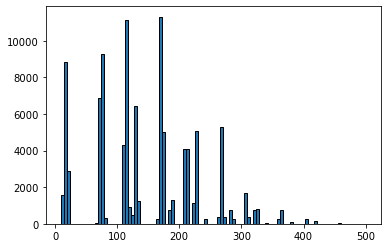

In [13]:
# use matplotlib/pyplot
from matplotlib import pyplot as plt
%matplotlib inline
plt.hist (scores, bins=100, edgecolor='black')

#### b) Hypothesis Testing pt. 2
Assume that in your initial roll, you scored 268. Is this significantly above what is to be expected? Compute the corresponding _p_-value.

In [14]:
p_value = np.sum([1 for x in scores if x >= 268]) / len(scores)
print(p_value)

0.08589


**Answer:** In this case we have that $p>0.05$, so this is not a statistically significant outlier.

#### c) Conditional Probability and Bayes Theorem

Based on your simulation, give an estimation of the probability of scoring over 100 points, given that you did not roll a single 1. Afterwards, estimate the probability of scoring over 100 points, and apply your previous results and Bayes Theorem to compute the probability of not rolling a 1 given that you score over 100 points.

In [15]:
# probability of scoring over 150 points without rolling a 1
p1 = sum(1 if scores[i] > 100 and 1 not in rolls[i] else 0 for i in range(100000))/100000

# probability of not rolling a 1
p2 = sum(1 if 1 not in roll else 0 for roll in rolls)/100000

p_cond = p1/p2

print("P(score>100|no 1 rolled) = " + str(p_cond))

P(score>100|no 1 rolled) = 0.26007307797469614


In [16]:
p3 = sum(1 if score > 100 else 0 for score in scores)/100000

print("P(no 1 rolled | score>100) = " + str(p_cond*p2/p3))

P(no 1 rolled | score>100) = 0.14897767399476022
